In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
with open('Все идет по плану.txt', 'r', encoding='utf-8') as file:
    file = file.read()

In [ ]:
from nltk import word_tokenize
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

a = ord('а')
russian = ''.join([chr(i) for i in range(a, a+32)])

words = word_tokenize(file)

russian_words = []
for word in words:
    flag = True
    for char in word:
        if char not in russian:
            flag = False
            break
    if flag:
        russian_words.append(word)

russian_words = [word for word in russian_words
                 if ('NOUN' in morph.parse(word)[0].tag) or
                    ('ADJF' in morph.parse(word)[0].tag)]

cloud = Counter(russian_words)

stopwords = set(STOPWORDS)
cloud = ' '.join(cloud)
wordcloud = WordCloud(width = 1000, height = 1000, 
                      stopwords = stopwords, 
                      min_font_size = 8,background_color='white'
                      ).generate(cloud)


plt.figure(figsize = (14, 14)) 
plt.imshow(wordcloud)
pass

In [46]:
import random
import importlib as imp

from algorithm import naive
from algorithm import rabin_karp
from algorithm import boyer_moore_horspool
from algorithm import knuth_morris_pratt
from utils import tools

tools                = imp.reload(tools) 
rabin_karp           = imp.reload(rabin_karp) 
naive                = imp.reload(naive) 
boyer_moore_horspool = imp.reload(boyer_moore_horspool)
knuth_morris_pratt   = imp.reload(knuth_morris_pratt)

len_candidate = 3
len_reference = 150
dictionary    = ['a', 'b', 'c', 'd']

reference = tools.gen_random_string(dictionary, len_reference)
candidate = tools.gen_random_string(dictionary, len_candidate)

print('Reference: {}'.format(reference))
print('Candidate: {}'.format(candidate))

alg = knuth_morris_pratt.KnuthMorrisPratt(reference)
# alg = boyer_moore_horspool.BoyerMooreHorspool(reference)
# alg = rabin_karp.RabinKarp(reference)
# alg = naive.BruteForce(reference)
alg.set_candidate(candidate)
offset_lst = alg.search(multiple_search=True)

print('Indexes:   {}'.format(offset_lst))

reference = list(reference)
i = 0 
for offset in offset_lst:
    ofst = offset + i
    reference.insert(ofst, '_')
    for i_char in range(len_candidate):
        reference[ofst + i_char + 1] = reference[ofst + i_char + 1].upper()
    reference.insert(ofst + len_candidate + 1, '_')
    i += 2
reference = ''.join(reference)
print('Result:    {}'.format(reference))

Reference: bbccacdadbcaddbaabddcbaccaccabbcdbbdbbacbddadaddaddbabacdddbadccadccababbbaddbbaabcbbadbdaacdcbdbbcbcbaacdccbcadcdddadaadbcbdaacadabbcdcdcabbacbdcbaaa
Candidate: dba
Indexes:   [13, 50, 58]
Result:    bbccacdadbcad_DBA_abddcbaccaccabbcdbbdbbacbddadaddad_DBA_bacdd_DBA_dccadccababbbaddbbaabcbbadbdaacdcbdbbcbcbaacdccbcadcdddadaadbcbdaacadabbcdcdcabbacbdcbaaa


In [121]:
%%time
from utils import tools
tools = imp.reload(tools)

algorithms     = [rabin_karp.RabinKarp, boyer_moore_horspool.BoyerMooreHorspool, knuth_morris_pratt.KnuthMorrisPratt]
set_params     = [{}, {}, {}]
reference_len  = np.arange(1000, 100000, 600).tolist()
dictionary     = ['a', 'b', 'c']
n_observations = 5
coef           = 0.001


info_df = tools.generate_stat(  algorithms=algorithms,
                                set_params=set_params,
                                gen_string=tools.gen_random_string,
                                dictionary=dictionary,
                                reference_len=reference_len,
                                candidate_len=[round(rlen * coef) for rlen in  reference_len],
                                n_observations=n_observations)

Wall time: 1min 17s


In [122]:
stat_df         = info_df.groupby(['algorithm', 'reference_len']).agg({'execution':['mean','std']})
stat_df.columns = ['execution mean', 'execution std']
stat_df         = stat_df.reset_index()

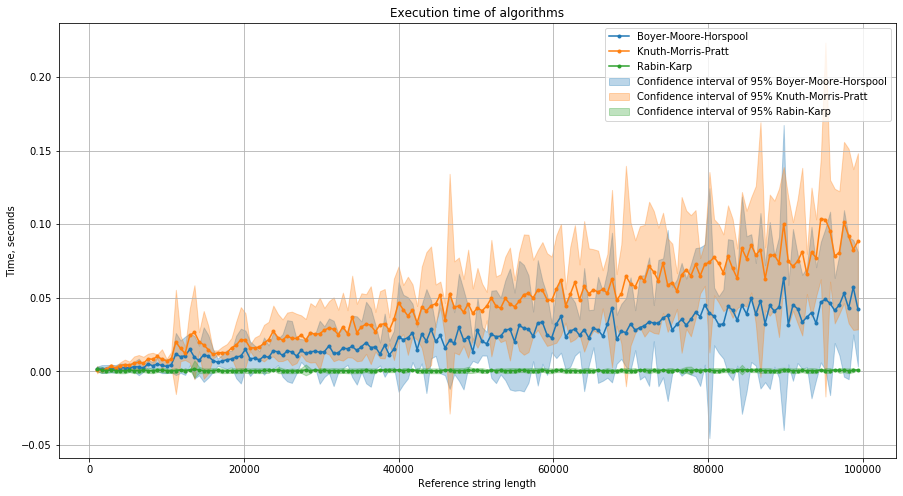

In [123]:
tools = imp.reload(tools)
tools.get_plots(stat_df, figsize=(15, 8))

In [124]:
import os
PATH_TO_BENCHMARKS = './benchmarks/'
all_files = os.listdir(PATH_TO_BENCHMARKS)

In [100]:
names = ['bad_w', 'bad_t', 'good_w', 'good_t']
info_file = {'bad_w' :[], 
             'bad_t' :[], 
             'good_w':[], 
             'good_t':[]}
for n in names:
    for l in all_files:
        if (l.startswith(n)):
            info_file[n].append(l)

In [145]:
tools = imp.reload(tools)
info_df_benchmarks = tools.generate_stat_for_benchmarks(  algorithms=algorithms,
                                set_params=set_params,
                                files_w   = info_file['good_w'],
                                files_t   = info_file['good_t'],
                                path_to_benchmarks = PATH_TO_BENCHMARKS,
                             )

In [146]:
info_df_benchmarks

,algorithm,reference_len,candidate_len,preprocessing,execution,indexes
0,Rabin-Karp,694,17,0.001001,0.000000,[]
1,Boyer-Moore-Horspool,694,17,0.000000,0.000000,[599]
2,Knuth-Morris-Pratt,694,17,0.000000,0.001997,[599]
3,Rabin-Karp,1158,85,0.000000,0.000000,[]
4,Boyer-Moore-Horspool,1158,85,0.000000,0.000000,[610]
5,Knuth-Morris-Pratt,1158,85,0.000000,0.002998,[610]
6,Rabin-Karp,3438,381,0.000000,0.000000,[]
7,Boyer-Moore-Horspool,3438,381,0.000000,0.001000,[1629]
8,Knuth-Morris-Pratt,3438,381,0.000000,0.004997,[1629]
9,Rabin-Karp,10714,92,0.000000,0.000000,[]


In [147]:
stat_df_benchmarks = info_df_benchmarks.groupby(['algorithm', 'reference_len']).agg({'execution':['mean','std']})
stat_df_benchmarks.columns = ['execution mean', 'execution std']
stat_df_benchmarks         = stat_df_benchmarks.reset_index()

In [148]:
stat_df_benchmarks

,algorithm,reference_len,execution mean,execution std
0,Boyer-Moore-Horspool,694,0.000000,NaN
1,Boyer-Moore-Horspool,1158,0.000000,NaN
2,Boyer-Moore-Horspool,3438,0.001000,NaN
3,Boyer-Moore-Horspool,10714,0.001000,NaN
4,Knuth-Morris-Pratt,694,0.001997,NaN
5,Knuth-Morris-Pratt,1158,0.002998,NaN
6,Knuth-Morris-Pratt,3438,0.004997,NaN
7,Knuth-Morris-Pratt,10714,0.011992,NaN
8,Rabin-Karp,694,0.000000,NaN
9,Rabin-Karp,1158,0.000000,NaN


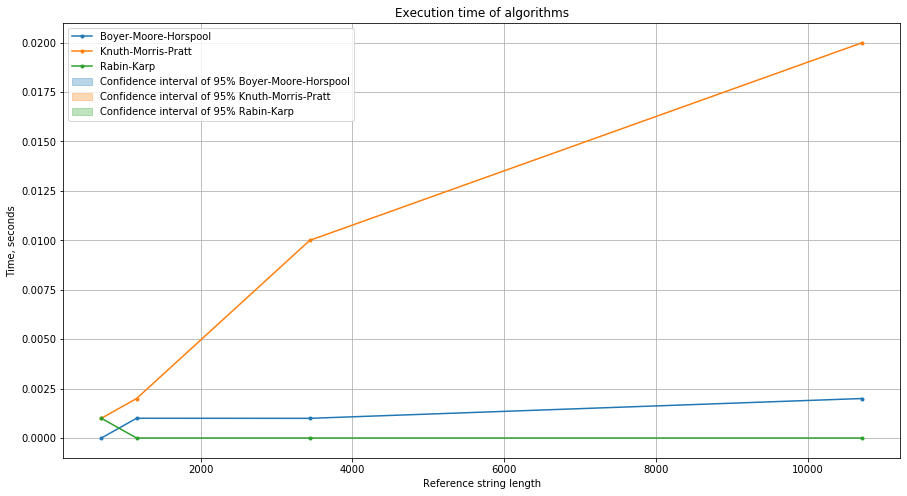

In [149]:
tools = imp.reload(tools)
tools.get_plots(stat_df, figsize=(15, 8))